In [5]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from IPython.display import display,HTML
import pandas as pd
import math

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


import limid_helper
importlib.reload(limid_helper)

<module 'limid_helper' from 'C:\\Users\\kottev\\Documents\\PythonScripts\\jupyler\\contribution2\\limid_helper.py'>

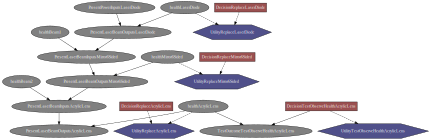

In [6]:
diag=gum.loadID("structure1.bifxml")
gnb.showInfluenceDiagram(diag)

In [7]:
# Maak de test duuder, was 100 wordt 250.

diag.utility('UtilityTestObserveHealthAcrylicLens')[{"DecisionTestObserveHealthAcrylicLens":"yes"}]=-250

found_policy = limid_helper.determine_optimal_plan(gum, diag, 'PresentLaserBeamOutputsAcrylicLens')

# Create a DataFrame
df = pd.DataFrame(found_policy, index=range(1, len(found_policy) + 1))

# Display the DataFrame as a table
display(df)


,Test Decision,MEU
1,DecisionReplaceAcrylicLens,-407.847661
2,DecisionReplaceLaserDiode,-658.557336
3,DecisionReplaceMirror6Sided,-888.990343
4,DecisionTestObserveHealthAcrylicLens,-1153.000000


In [8]:
# Maak vervangen van de diode goedkoper, was 150 wordt 100
diag.utility('UtilityReplaceLaserDiode')[{"DecisionReplaceLaserDiode":"yes","healthLaserDiode":'broken'}]=-100

found_policy = limid_helper.determine_optimal_plan(gum, diag, 'PresentLaserBeamOutputsAcrylicLens')
# Create a DataFrame
df = pd.DataFrame(found_policy, index=range(1, len(found_policy) + 1))
# Display the DataFrame as a table
display(df)

,Test Decision,MEU
1,DecisionReplaceAcrylicLens,-407.847661
2,DecisionReplaceLaserDiode,-654.206772
3,DecisionReplaceMirror6Sided,-888.990343
4,DecisionTestObserveHealthAcrylicLens,-1153.000000


In [9]:
# Wijzig prio probability van Health van Acrylic lens van 2% kans op broken naar 4 %
diag.cpt('healthAcrylicLens').fillWith([0.96,0.04])

found_policy = limid_helper.determine_optimal_plan(gum, diag, 'PresentLaserBeamOutputsAcrylicLens')
# Create a DataFrame
df = pd.DataFrame(found_policy, index=range(1, len(found_policy) + 1))
# Display the DataFrame as a table
display(df)


,Test Decision,MEU
1,DecisionReplaceAcrylicLens,-378.421090
2,DecisionReplaceLaserDiode,-654.206772
3,DecisionReplaceMirror6Sided,-888.990343
4,DecisionTestObserveHealthAcrylicLens,-1153.000000
